In [1]:
import bokeh.io
import bokeh.plotting
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.layouts import gridplot
from bokeh.plotting import figure
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from bokeh.models import ColumnDataSource, Whisker
import statistics as st
from scipy import stats

from natsort import natsorted, ns

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
MiceToAnalyze = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199','GF200','GF201','GF207']
ArtiFactMice = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199']
LearningDictionary = {
    
    'GF173' : True,
    'GF174' : True,
    'GF175' : True,
    'GF181' : True,
    'GF182' : False,
    'GF187' : False,
    'GF193' : True,
    'GF199' : True,
    'GF200' : True,
    'GF201' : True,
    'GF202' : True,
    'GF203' : False,
    'GF204' : True,
    'GF206' : True,
    'GF207' : False,
    'GF209' : True 
    
    
}

In [3]:
#Read the 2P pickle file for every mouse to analyse

FS = 0
SS = 0

serverPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\'

dataDays = np.zeros([len(MiceToAnalyze),6,211,6])
CellsFlag = []
CellsAmpAud = []
CellsAmpWh = []

for i, mouse in enumerate(MiceToAnalyze):
    
    print('Reading 2P file for the mouse : ' + mouse + '...')
    
    dataPath = serverPath + mouse + "\\2P\\" + mouse + '_2P.p' 
    
    with open(dataPath, 'rb') as fp:
        data = pickle.load(fp)
      
    print('Calculating mean for mouse: ' + mouse)
    
    if LearningDictionary[mouse]:
        
        print('Fast switcher')
        
        FS +=1 
        
        
    else:
        
        print('Slow switcher')
        
        SS +=1     
    
    FlagCells = np.zeros(data[3]['WH']['WHDFF'].shape[0])
    AmpTempAud = np.zeros([data[3]['WH']['WHDFF'].shape[0],3])
    AmpTempWh = np.zeros([data[3]['WH']['WHDFF'].shape[0],3])
    
    for d in range(3,6):
        
        AmpTempList = []
        
        MeanTrialWH = np.mean(data[d]['WH']['WHDFF'],axis =2)
        MeanTrialAH = np.mean(data[d]['AH']['AHDFF'],axis =2)
        
        AmpTempAud[:,d-3] = np.absolute(np.mean(MeanTrialAH[:,56:59],axis =1)-np.max(MeanTrialAH[:,60:68],axis=1))
        AmpTempWh[:,d-3] = np.absolute(np.mean(MeanTrialWH[:,56:59],axis =1)-np.max(MeanTrialWH[:,60:68],axis=1))
        
        for i in range(MeanTrialWH.shape[0]):
            
            dataWH = (MeanTrialWH[i])
            dataAH = (MeanTrialAH[i])
            baseAH = dataAH[56:59]
            baseWH = dataWH[56:59]
            testAH = dataAH[60:63]
            testWH = dataWH[60:63]
            [sWH,pWH] = stats.ranksums(baseWH,testWH)
            [sAH,pAH] = stats.ranksums(baseAH,testAH)
            
            if pAH < 0.05 and pWH < 0.05:
                
                FlagCells[i] = 3
                
            elif pAH < 0.05 and FlagCells[i] == 1 and pWH >= 0.05:
                
                FlagCells[i] = 3
                
            elif pAH < 0.05 and FlagCells[i] == 2 and pWH >= 0.05:
                
                FlagCells[i] = 2
                
            elif pWH < 0.05 and FlagCells[i] == 1 and pAH >= 0.05 :
                
                FlagCells[i] = 1
                
            elif pWH < 0.05 and FlagCells[i] == 2 and pAH >= 0.05 :
                
                FlagCells[i] = 3
                
            elif pAH < 0.05 and FlagCells[i] == 0 and pWH >= 0.05:
                
                FlagCells[i] = 2
            
            elif pWH < 0.05 and FlagCells[i] == 0 and pAH >= 0.05:
                
                FlagCells[i] = 1
                
            AmpAud =np.mean(AmpTempAud,axis =1)
            AmpWh =np.mean(AmpTempWh,axis =1)
            
                
                
    CellsFlag.append(FlagCells)
    CellsAmpAud.append(AmpAud)
    CellsAmpWh.append(AmpWh)

        

   
    

Reading 2P file for the mouse : GF173...
Calculating mean for mouse: GF173
Fast switcher
Reading 2P file for the mouse : GF174...
Calculating mean for mouse: GF174
Fast switcher
Reading 2P file for the mouse : GF175...
Calculating mean for mouse: GF175
Fast switcher
Reading 2P file for the mouse : GF181...
Calculating mean for mouse: GF181
Fast switcher
Reading 2P file for the mouse : GF187...
Calculating mean for mouse: GF187
Slow switcher
Reading 2P file for the mouse : GF193...
Calculating mean for mouse: GF193
Fast switcher
Reading 2P file for the mouse : GF199...
Calculating mean for mouse: GF199
Fast switcher
Reading 2P file for the mouse : GF200...
Calculating mean for mouse: GF200
Fast switcher
Reading 2P file for the mouse : GF201...
Calculating mean for mouse: GF201
Fast switcher
Reading 2P file for the mouse : GF207...
Calculating mean for mouse: GF207
Slow switcher


In [6]:
CellsAmpAud[0].shape

(231,)

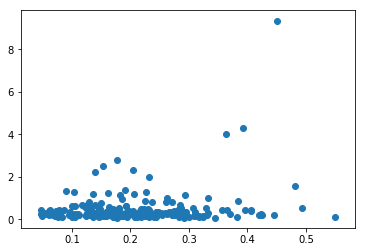

In [8]:
plt.scatter(CellsAmpAud[0],CellsAmpWh[0])

In [7]:
AmpWh.shape

(231,)

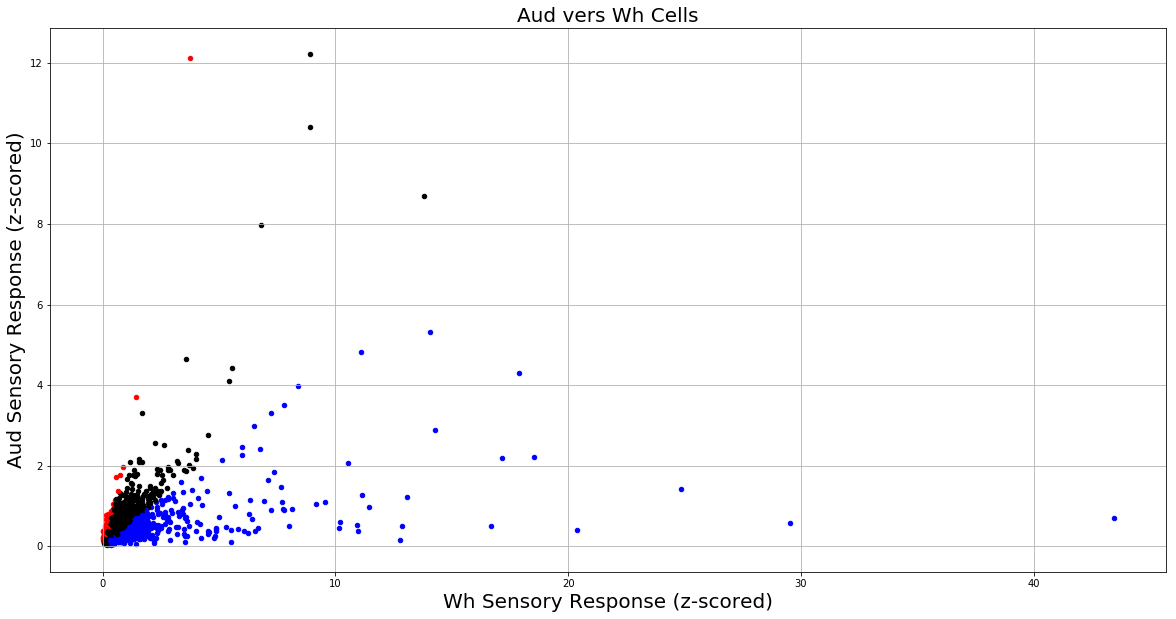

In [7]:
plt.figure(figsize=(20, 10))
for i in range(len(CellsAmpAud)):
    for j in range(CellsAmpAud[i].shape[0]):
        if CellsAmpWh[i][j] > 2*CellsAmpAud[i][j]:
            plt.scatter(CellsAmpWh[i][j],CellsAmpAud[i][j],color ='b',s =20)
        elif 2*CellsAmpWh[i][j] < CellsAmpAud[i][j]:
            plt.scatter(CellsAmpWh[i][j],CellsAmpAud[i][j],color ='r',s =20)
        else:
            plt.scatter(CellsAmpWh[i][j],CellsAmpAud[i][j],color ='k',s =20)
plt.title('Aud vers Wh Cells',fontsize = 20)  
plt.xlabel('Wh Sensory Response (z-scored)',fontsize = 20)
plt.ylabel('Aud Sensory Response (z-scored)',fontsize = 20)
plt.grid()

In [29]:
CellsAmpWh[0][2] > 2*CellsAmpAud[0][2]

False

In [27]:
CellsAmpWh[0][2]



0.2680346361168483

In [28]:
CellsAmpAud[0][2]

0.42340818442569544

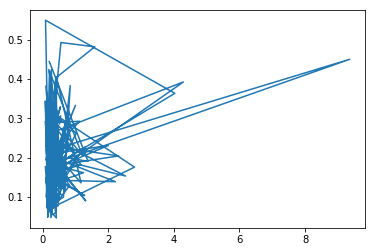

In [8]:
plt.plot(AmpWh,AmpAud)

In [41]:
AmpTempAud[:,1] =A

In [37]:

A =np.absolute(np.mean(MeanTrialAH[:,56:59],axis =1)-np.max(MeanTrialAH[:,60:63],axis=1))

In [38]:
A.shape

(231,)

In [4]:
TotalCells = 0
AudCells = 0
WhiskerCells = 0
BothCells  = 0
NoCells = 0
for i in range(len(CellsFlag)):
    TotalCells = TotalCells + CellsFlag[i].shape[0]
    NoCells = NoCells + sum(CellsFlag[i]==0)
    AudCells = AudCells + sum(CellsFlag[i]==2)
    WhiskerCells = WhiskerCells + sum(CellsFlag[i]==1)
    BothCells = BothCells + sum(CellsFlag[i]==3)

In [5]:
TotalCells


2274

In [9]:
AudCells

246

In [10]:
WhiskerCells


954

In [11]:
BothCells

610

In [16]:
NoCells

464

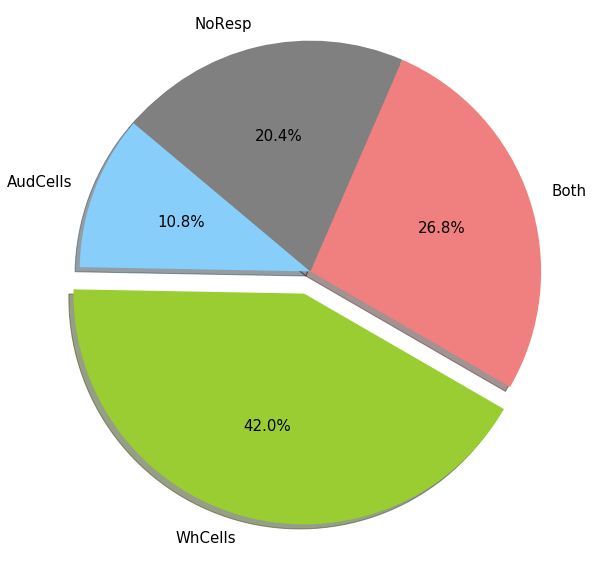

In [6]:
# Data to plot
plt.figure(figsize=(10, 10))
labels = 'AudCells', 'WhCells', 'Both', 'NoResp'
sizes = [AudCells, WhiskerCells, BothCells, NoCells]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral', 'grey']
explode = (0, 0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,textprops={'fontsize': 15},
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()